<a href="https://colab.research.google.com/github/wagner1986/PapyrusTech/blob/main/global_structurer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

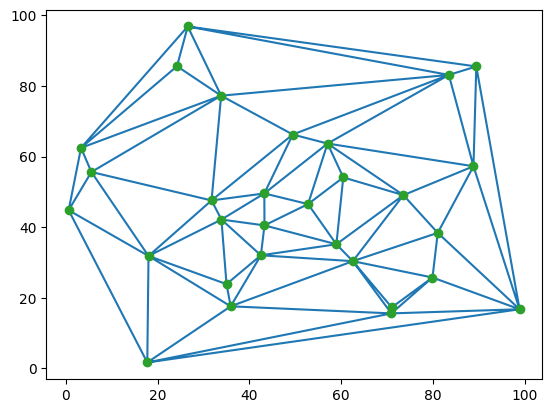

Matching Points: 30


In [6]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import floyd_warshall
from scipy.spatial import Delaunay

INF = np.inf

# Calcula a distância Euclidiana entre dois pontos p1 e p2
def distancePoint(p1, p2):
    ax, ay = p1[0], p1[1]
    bx, by = p2[0], p2[1]
    dist = math.hypot(ax - bx, ay - by)
    return dist

# Aplica o algoritmo de Floyd-Warshall para encontrar as menores distâncias entre todos os pares de vértices
def floydWarshall(graph):
    graph = csr_matrix(graph)
    dist_matrix, predecessors = floyd_warshall(csgraph=graph, directed=False, return_predecessors=True)
    return dist_matrix

# Constrói a matriz de adjacência do grafo baseado em conexões entre pontos
def buildMapGraph(mapConex, mapPoint):
    size = len(mapPoint)
    sample = np.matrix(np.ones((size, size)) * np.inf)
    for i in range(size):
        sample[i, i] = 0  # Distância de um ponto para si mesmo é 0
    for conexao in mapConex:
        distance = distancePoint(mapPoint[conexao[0]], mapPoint[conexao[1]])
        sample[conexao[0], conexao[1]] = distance
    return sample

# Constrói conexões baseadas nos simplices da triangulação de Delaunay
def buildConnection(tri):
    mapConnection = []
    for simplice in tri.simplices:
        # Cada simplex representa um triângulo; adicione as arestas do triângulo ao grafo
        mapConnection.append([simplice[0], simplice[1]])
        mapConnection.append([simplice[1], simplice[2]])
        mapConnection.append([simplice[2], simplice[0]])
    return mapConnection

# Plota os pontos e a triangulação de Delaunay
def plot_delaunay(points, tri):
    plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy())
    plt.plot(points[:, 0], points[:, 1], 'o')
    plt.show()

# Extrai o grafo a partir de um conjunto de pontos usando Delaunay, e calcula a matriz de distâncias usando Floyd-Warshall
def extract_graph(points):
    new_points = np.flip(points, axis=1)
    tri = Delaunay(new_points)
    mapConnection = buildConnection(tri)
    sample = buildMapGraph(mapConnection, new_points)
    graphCalc = floydWarshall(sample)
    return graphCalc, new_points, tri

# Compara duas matrizes de distância e conta os elementos cuja diferença é menor que um limiar
def match_matrix(mat_a, mat_b):
    mat_dist = mat_b - mat_a
    for i in range(mat_dist.shape[0]):
        mat_dist[i, :i] = 0  # Zera a metade inferior da matriz para evitar duplicação
    mat_dist = mat_dist * mat_dist  # Eleva as diferenças ao quadrado
    points = 0
    for i in range(mat_dist.shape[0]):
        for j in range(i + 1, mat_dist.shape[0]):
            if mat_dist[i, j] < 9:  # Limiar de similaridade
                points += 1
    return points

# Exemplo de função main para executar o código
def main():
    # Gera um conjunto aleatório de pontos
    points = np.random.rand(30, 2) * 100

    # Extrai o grafo, calcula as distâncias mínimas e obtém a triangulação de Delaunay
    dist_matrix, new_points, tri = extract_graph(points)

    # Plota a triangulação de Delaunay
    plot_delaunay(new_points, tri)

    # Gera outro conjunto aleatório de pontos para comparação
    points2 = np.random.rand(30, 2) * 100
    dist_matrix2, new_points2, tri2 = extract_graph(points2)

    # Compara as matrizes de distância dos dois grafos
    matching_points = match_matrix(dist_matrix, dist_matrix2)
    print(f"Matching Points: {matching_points}")

if __name__ == "__main__":
    main()
